# Electric Vehicle Type EDA

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### The dataset used in this project is the [Electric Vehicle Population Data](https://www.kaggle.com/rajkumarpandey02/electric-vehicle-population-data) from Kaggle.

In [53]:
# load the data

data = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [54]:
# Display the first few rows of the dataframe
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA0K,Thurston,Tumwater,WA,98512.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,22.0,242565116,POINT (-122.91310169999997 47.01359260000004),PUGET SOUND ENERGY INC,5.306701e+10
1,1N4BZ1DV4N,Island,Clinton,WA,98236.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,10.0,183272785,POINT (-122.35936399999997 47.97965520000008),PUGET SOUND ENERGY INC,5.302997e+10
2,5YJ3E1EA0L,Snohomish,Snohomish,WA,98290.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,44.0,112552366,POINT (-122.09150499999998 47.91555500000004),PUGET SOUND ENERGY INC,5.306105e+10
3,5YJ3E1EBXL,King,Seattle,WA,98134.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,11.0,6336319,POINT (-122.32981499999994 47.579810000000066),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1CP0D,Snohomish,Edmonds,WA,98020.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,69900.0,21.0,186212960,POINT (-122.37507 47.80807000000004),PUGET SOUND ENERGY INC,5.306105e+10


In [55]:
data.shape

(135038, 17)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135038 entries, 0 to 135037
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         135038 non-null  object 
 1   County                                             135030 non-null  object 
 2   City                                               135030 non-null  object 
 3   State                                              135038 non-null  object 
 4   Postal Code                                        135030 non-null  float64
 5   Model Year                                         135038 non-null  int64  
 6   Make                                               135038 non-null  object 
 7   Model                                              134789 non-null  object 
 8   Electric Vehicle Type                              135038 non-null  object

## Description of Features
The dataset contains several interesting features related to electric vehicles. Here are some initial thoughts on what these features represent:

    -VIN (1-10): Vehicle Identification Number, this is unique for each vehicle
    -County, City, State, Postal Code: Location information of the vehicle
    -Model Year: The year the vehicle model was released
    -Make, Model: Manufacturer and model of the vehicle
    -Electric Vehicle Type: The type of electric vehicle, likely indicating the energy source
    -Clean Alternative Fuel Vehicle (CAFV) Eligibility: Indicates whether the vehicle is eligible as a clean alternative fuel vehicle
    -Electric Range: The range of the vehicle on electric power
    -Base MSRP: The manufacturer's suggested retail price
    -Legislative District: The legislative district in which the vehicle is located
    -DOL Vehicle ID: Department of Licensing Vehicle ID, another unique identifier for the vehicle
    -Vehicle Location: The precise geographical coordinates of the vehicle
    -Electric Utility: The utility that supplies the vehicle's electric power
    -2020 Census Tract: The census tract where the vehicle is located, which could be useful for demographic information

### EDA

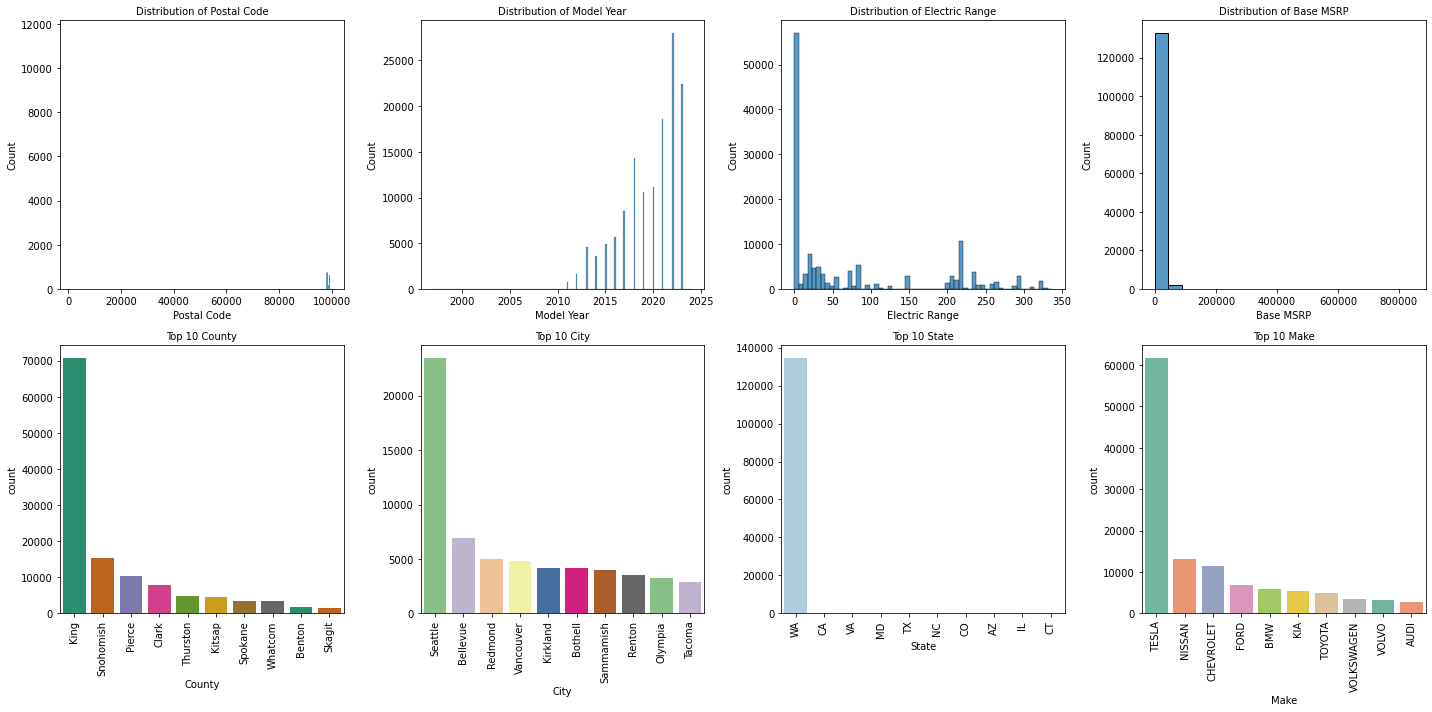

In [57]:
# Define the numerical and categorical features
numerical_features = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
categorical_features = ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']

# Set up the figure and axes for the plots
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

# Create a palette list that matches the number of numerical and categorical features
color_palette_list = ['Blues_d', 'Reds_d', 'Pastel1', 'Pastel2', 'Dark2', 'Accent', 'Paired', 'Set2'] * 2

# Plot the distribution of the numerical features
for i, num_var in enumerate(numerical_features[:4]):
    sns.histplot(data[num_var], kde=False, ax=ax[0, i], palette=color_palette_list[i])
    ax[0, i].set_title(f'Distribution of {num_var}', fontsize=10)

# Plot the count of the top 10 categories for the categorical features
for i, cat_var in enumerate(categorical_features[:4]):
    sns.countplot(data=data, x=cat_var, order=data[cat_var].value_counts().index[:10], ax=ax[1, i], palette=color_palette_list[i+4])
    ax[1, i].set_title(f'Top 10 {cat_var}', fontsize=10)
    ax[1, i].tick_params(axis='x', rotation=90)

# Adjust the layout for better appearance
plt.tight_layout()
plt.show()

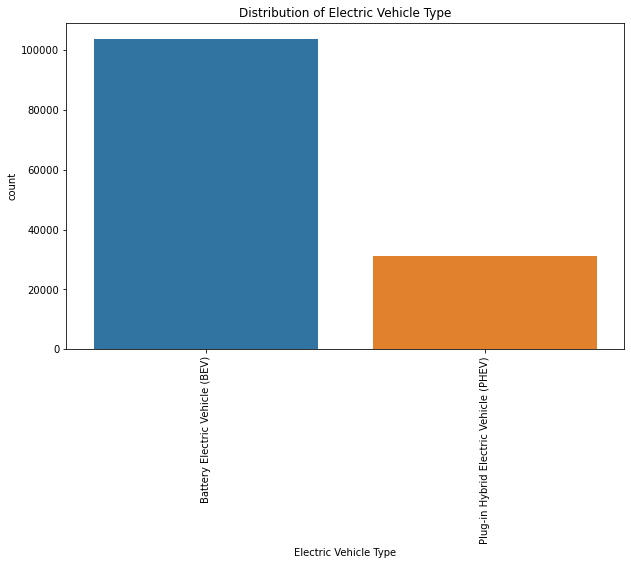

In [58]:
# Check the distribution of the 'Electric Vehicle Type'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Electric Vehicle Type')
plt.title('Distribution of Electric Vehicle Type')
plt.xticks(rotation=90)
plt.show()

In [59]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Legislative District    312
Model                   249
Vehicle Location         10
County                    8
City                      8
Postal Code               8
Electric Utility          8
2020 Census Tract         8
Electric Range            1
Base MSRP                 1
dtype: int64

## Electric Vehicle Count by make

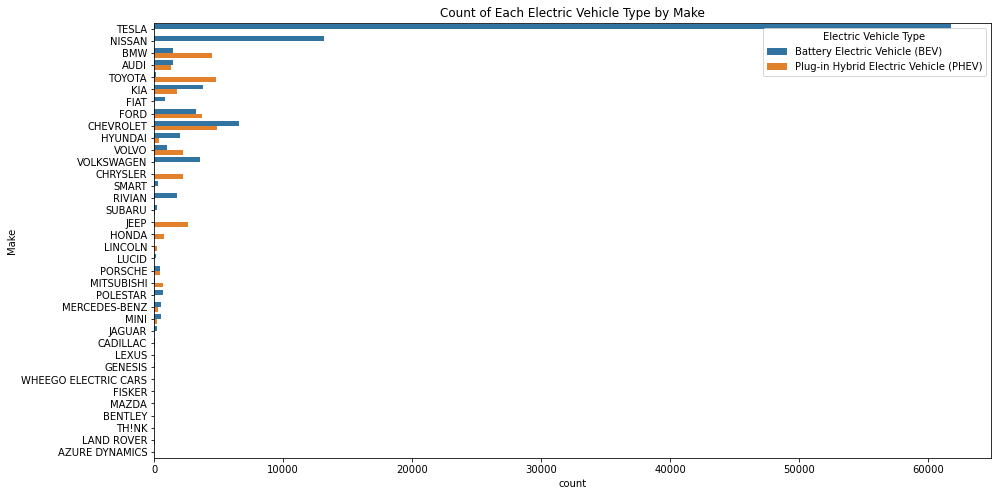

In [60]:
# Count of each electric vehicle type by make
plt.figure(figsize=(15, 8))
sns.countplot(data=data, y='Make', hue='Electric Vehicle Type')
plt.title('Count of Each Electric Vehicle Type by Make')
plt.show()

### <font color='blue'><i> Tesla predominantly manufactures Battery Electric Vehicles (BEV), while other manufacturers like Chevrolet and Ford have a mix of BEV and Plug-in Hybrid Electric Vehicles (PHEV).</i></font>

## Average electric range by type

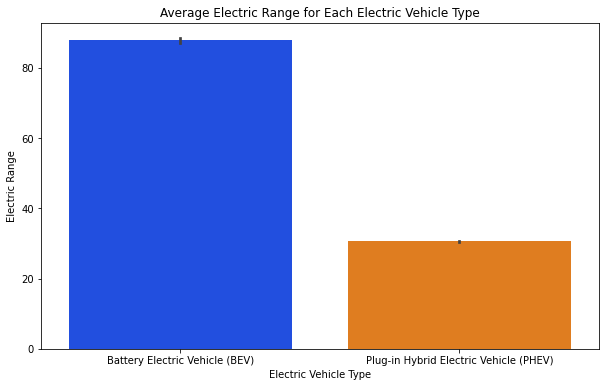

In [61]:
# Average electric range for each electric vehicle type
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Electric Vehicle Type', y='Electric Range', estimator=np.mean,palette='bright')
plt.title('Average Electric Range for Each Electric Vehicle Type')
plt.show()

### <font color='blue'><i> The Average Electric Range for BEV is much higher than PHEV which may indicate why BEV is more widely purchased. </i></font>

## Electric Vehicle Type by Year

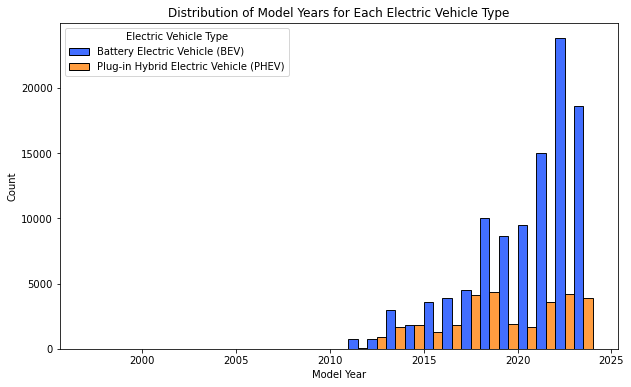

In [62]:
# Distribution of model years for each electric vehicle type
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Model Year', hue='Electric Vehicle Type', multiple='dodge', binwidth=1, palette='bright')
plt.title('Distribution of Model Years for Each Electric Vehicle Type')
plt.show()


### <font color='blue'><i> The production of Battery Electric Vehicles (BEV) has significantly increased over the years, especially after 2018. </i></font>

## Electric Vehicle by County

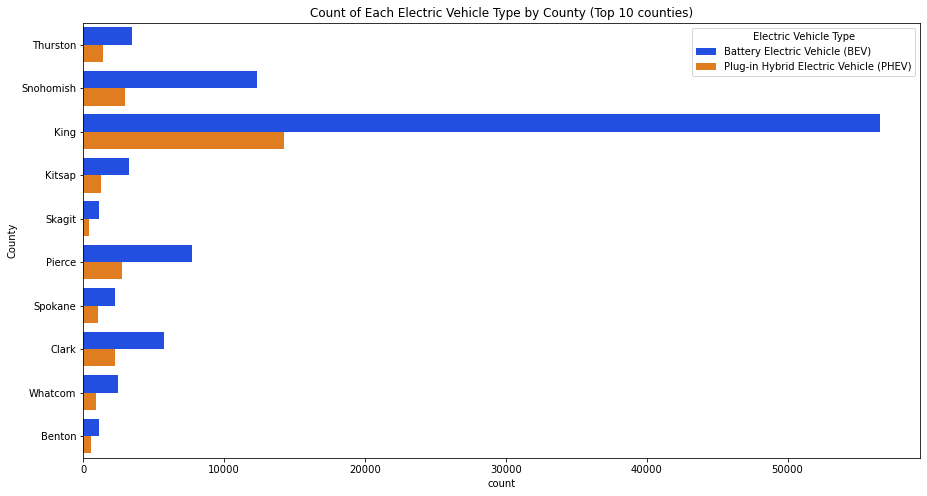

In [63]:
# Count of each electric vehicle type by county (Top 10 counties only)
top_counties = data['County'].value_counts().index[:10]
plt.figure(figsize=(15, 8))
sns.countplot(data=data[data['County'].isin(top_counties)], y='County', hue='Electric Vehicle Type',palette='bright')
plt.title('Count of Each Electric Vehicle Type by County (Top 10 counties)')
plt.show()

### <font color='blue'><i> King county has the most electric vehicles, with a majority being Battery Electric Vehicles (BEV). Other counties also show a similar trend. </i></font>

## CAFV Eligibility

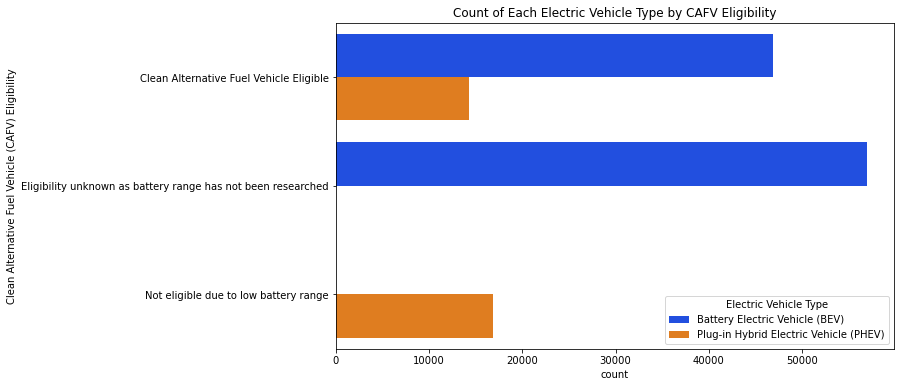

In [64]:
# Count of each electric vehicle type by 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='Clean Alternative Fuel Vehicle (CAFV) Eligibility', hue='Electric Vehicle Type',palette='bright')
plt.title('Count of Each Electric Vehicle Type by CAFV Eligibility')
plt.show()

### <font color='blue'><i> Most electric vehicles in the dataset are eligible as clean alternative fuel vehicles, regardless of whether they are Battery Electric Vehicles (BEV) or Plug-in Hybrid Electric Vehicles (PHEV).  </i></font>

## Base MSRP between BEV and PHEV

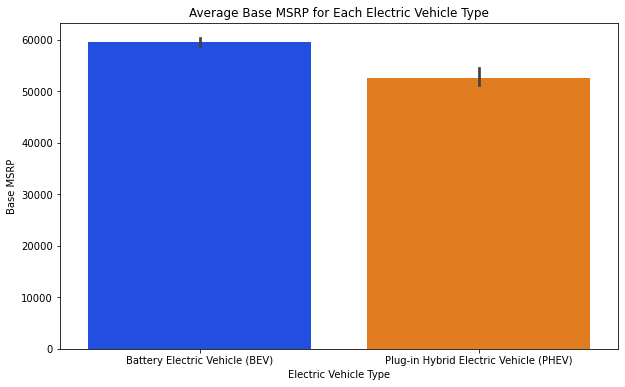

In [65]:
# Average 'Base MSRP' for each electric vehicle type
# We only consider rows where 'Base MSRP' is not zero for this analysis
non_zero_msrp = data[data['Base MSRP'] != 0]
plt.figure(figsize=(10, 6))
sns.barplot(data=non_zero_msrp, x='Electric Vehicle Type', y='Base MSRP', estimator=np.mean,palette='bright')
plt.title('Average Base MSRP for Each Electric Vehicle Type')
plt.show()

### <font color='blue'><i> The average manufacturer's suggested retail price (MSRP) seems to be higher for Battery Electric Vehicles (BEV) than for Plug-in Hybrid Electric Vehicles (PHEV). However, we only considered vehicles for which the Base MSRP is not zero in this analysis, and there are many vehicles in the dataset with a Base MSRP of zero.  </i></font>

## Electric Range BEV vs PHEV

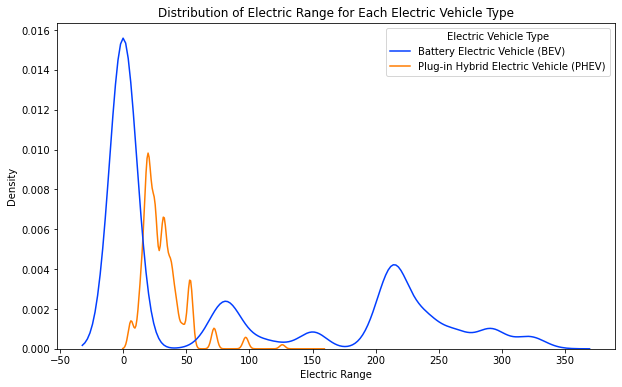

In [66]:
# Distribution of 'Electric Range' for each electric vehicle type
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Electric Range', hue='Electric Vehicle Type',palette='bright')
plt.title('Distribution of Electric Range for Each Electric Vehicle Type')
plt.show()

### <font color='blue'><i> Battery Electric Vehicles (BEV) have a wider range of electric range values compared to Plug-in Hybrid Electric Vehicles (PHEV), with some BEVs having a very high electric range.  </i></font>

## Utilities Usage

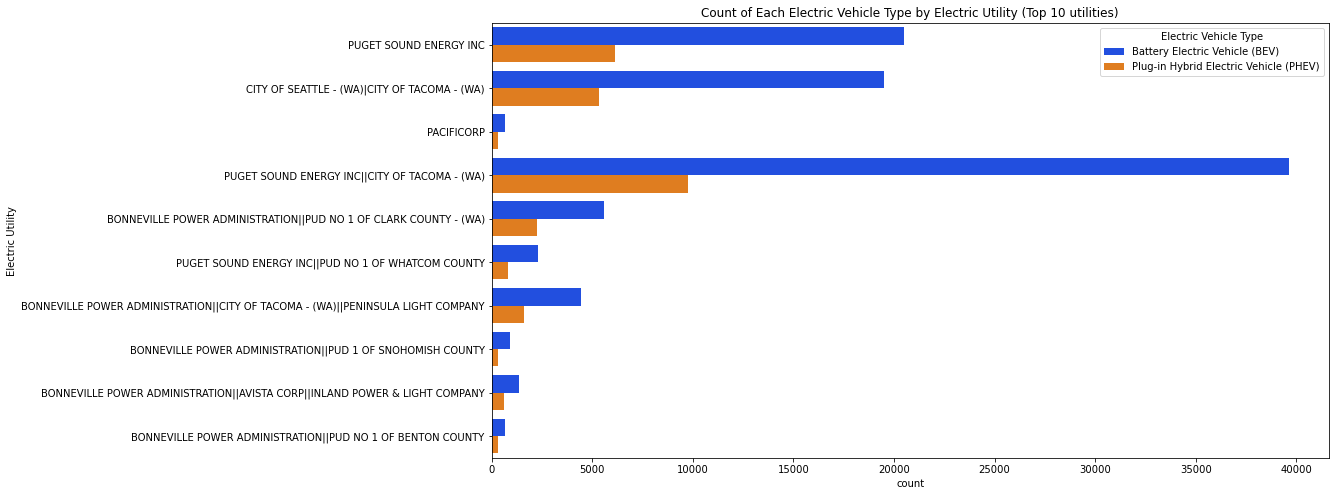

In [67]:
# Count of each electric vehicle type by 'Electric Utility' (Top 10 utilities only)
top_utilities = data['Electric Utility'].value_counts().index[:10]
plt.figure(figsize=(15, 8))
sns.countplot(data=data[data['Electric Utility'].isin(top_utilities)], y='Electric Utility', hue='Electric Vehicle Type',palette='bright')
plt.title('Count of Each Electric Vehicle Type by Electric Utility (Top 10 utilities)')
plt.show()

### <font color='blue'><i> Puget Sound Energy Inc serves the majority of the electric vehicles in the dataset, with a higher count of Battery Electric Vehicles (BEV) than Plug-in Hybrid Electric Vehicles (PHEV). </i></font>

## Electric Range & Base MSRP Relationship

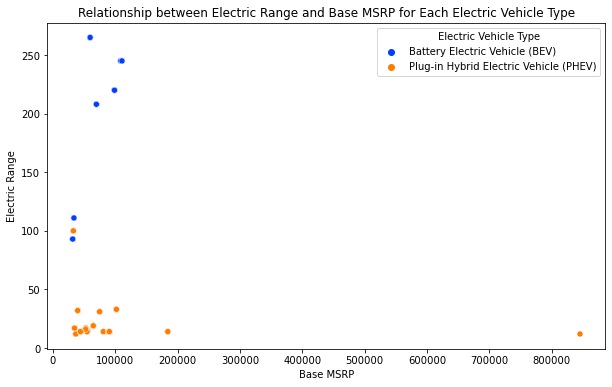

In [68]:
# The relationship between 'Electric Range' and 'Base MSRP' for each type of electric vehicle
# We only consider rows where 'Base MSRP' is not zero for this analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_msrp, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type',palette='bright')
plt.title('Relationship between Electric Range and Base MSRP for Each Electric Vehicle Type')
plt.show()

### <font color='blue'><i> The scatter plot shows a slight positive correlation between electric range and Base MSRP for Battery Electric Vehicles (BEV), indicating that BEVs with a higher electric range tend to be more expensive. However, there's no clear pattern for Plug-in Hybrid Electric Vehicles (PHEV). </i></font>

## Postal Code & Eletric Vehicle Type

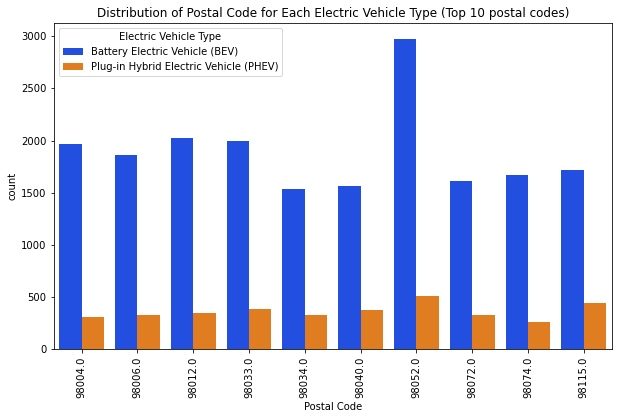

In [69]:
# The distribution of 'Postal Code' for each electric vehicle type (Top 10 postal codes only)
top_postal_codes = data['Postal Code'].value_counts().index[:10]
plt.figure(figsize=(10, 6))
sns.countplot(data=data[data['Postal Code'].isin(top_postal_codes)], x='Postal Code', hue='Electric Vehicle Type',palette='bright')
plt.title('Distribution of Postal Code for Each Electric Vehicle Type (Top 10 postal codes)')
plt.xticks(rotation=90)
plt.show()

### <font color='blue'><i> Most electric vehicles in the top 10 postal codes are Battery Electric Vehicles (BEV). The postal code 98052 has the highest count of electric vehicles. </i></font>

## Electric Range & Model Year

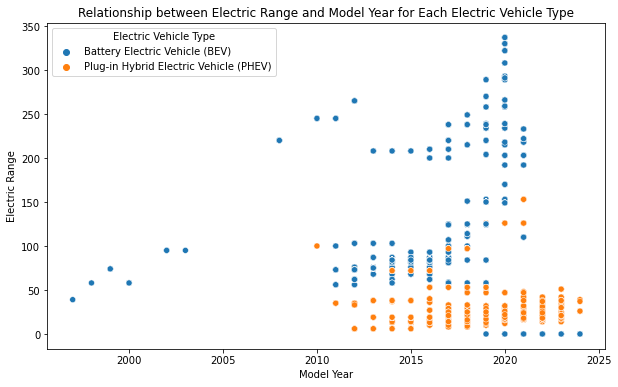

In [70]:
# The relationship between 'Electric Range' and 'Model Year' for each type of electric vehicle
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Model Year', y='Electric Range', hue='Electric Vehicle Type')
plt.title('Relationship between Electric Range and Model Year for Each Electric Vehicle Type')
plt.show()

### <font color='blue'><i> There's a clear positive trend for Battery Electric Vehicles (BEV), indicating that newer BEVs tend to have a higher electric range. However, there's no clear trend for Plug-in Hybrid Electric Vehicles (PHEV) </i></font>